<a href="https://colab.research.google.com/github/VladimirVladetic/VizualizacijaPodatakaDZ/blob/main/Vizualizacija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [9]:
import numpy as np
import pandas as pd
import os
import cv2
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import zipfile
import shutil

In [5]:
uploaded = files.upload()

source_path = '/content/kaggle.json'
destination_path = '/root/.kaggle/kaggle.json'
kaggle_dir = '/root/.kaggle/'
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)
os.rename(source_path, destination_path)

Saving kaggle.json to kaggle.json


In [6]:
!kaggle datasets download -d gregorut/videogamesales

  0% 0.00/381k [00:00<?, ?B/s]
100% 381k/381k [00:00<00:00, 104MB/s]


In [7]:
with zipfile.ZipFile('/content/videogamesales.zip', 'r') as zip_ref:
  zip_ref.extractall('/content')

In [17]:
df = pd.read_csv('vgsales.csv')

In [27]:
print(df.head())

   Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [ ]:
df = df.dropna(subset=['Year'], axis=0)
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].str.split('.').str[0]
df['Year'] = df['Year'].astype(int)

In [25]:
def gamesByYear(df):
  df['Year'] = df['Year'].astype(int)

  plt.figure(figsize=(10, 6))
  plt.hist(df['Year'], bins=30, color='skyblue', edgecolor='black')
  plt.title('Distribution of videogames by year of release')
  plt.xlabel('Year')
  plt.ylabel('Number of games')
  plt.grid(True)
  plt.show()

In [36]:
def gamesByPublisher(df):
  publisher_counts = df['Publisher'].value_counts()
  top_15_publishers = publisher_counts.head(15)

  # Combine counts of remaining publishers into 'Other' category
  other_publishers_count = publisher_counts.iloc[15:].sum()
  top_15_publishers['Other'] = other_publishers_count

  # Plot the number of games released by top 10 publishers and 'Other'
  plt.figure(figsize=(10, 6))  # Set the size of the plot
  top_15_publishers.plot(kind='bar', color='skyblue', edgecolor='black')
  plt.title('Number of Games Released by Top 15 Publishers')
  plt.xlabel('Publisher')
  plt.ylabel('Number of Games')
  plt.grid(True)  # Add grid lines for clarity
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.tight_layout()  # Adjust layout to prevent clipping of labels
  plt.show()

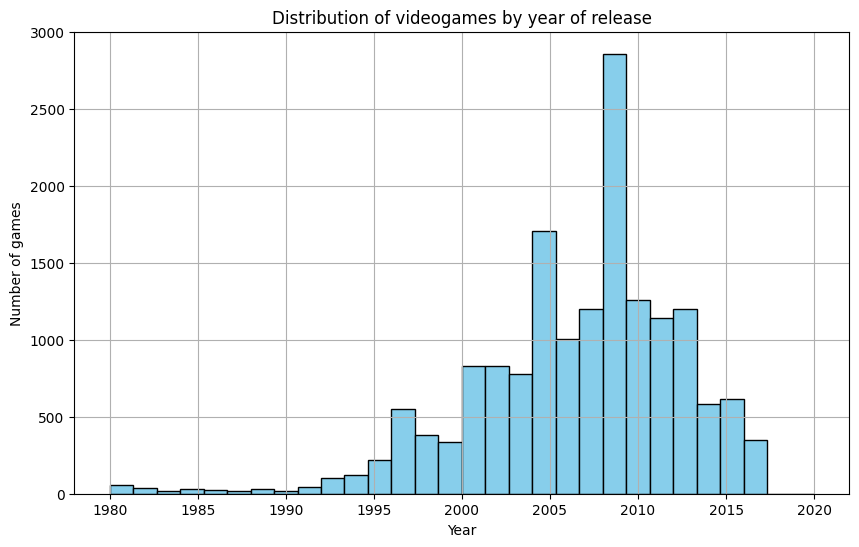

In [26]:
gamesByYear(df)

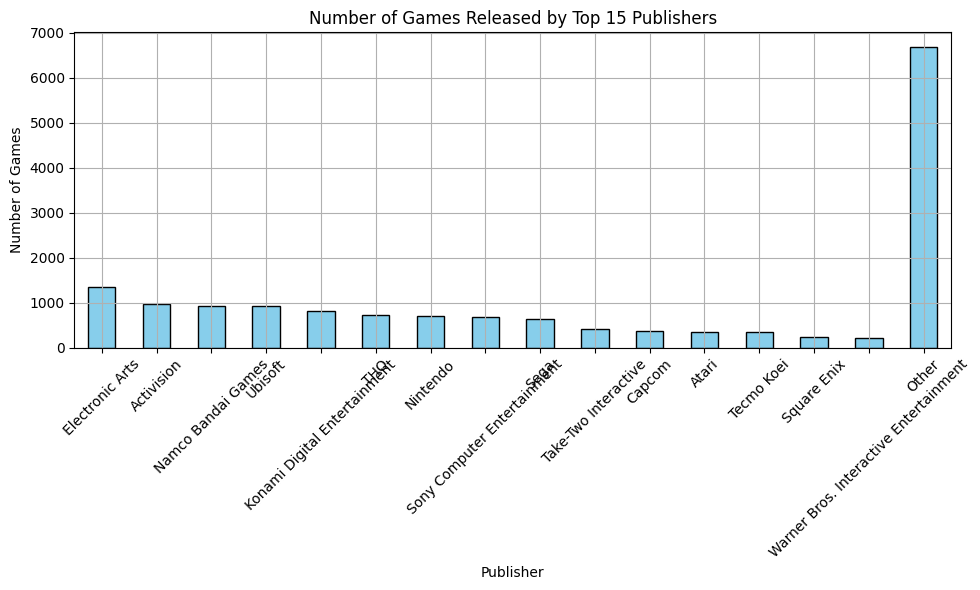

In [37]:
gamesByPublisher(df)